# Linear Regression Model From Scratch

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression():
  def __init__(self, learning_rate=0.01, n_iters=5):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y, print_loss=False, X_val=pd.DataFrame(), y_val=pd.Series()):    
    n_samples, n_features = X.shape

    # Initialize weights and bias
    self.weights = np.ones(n_features)
    self.bias = 1

    train_loss = []
    val_loss = []
    for _ in range(self.n_iters):
      y_pred = self.predict(X)

      # Calculate loss to print out later
      train_loss += [self.mse(y, y_pred)]
      if not X_val.empty and not y_val.empty:
        y_val_pred = self.predict(X_val)
        val_loss += [self.mse(y_val, y_val_pred)]

      # Calculate gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      # Gradient descent udpdate step
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

    if print_loss:
      self.show_summary(train_loss, val_loss)
  
  def predict(self, X):
    return np.dot(X,self.weights) + self.bias
  
  def mse(self, y_true, y_pred):
    return float((1 / len(y_true)) * np.sum((y_true - y_pred)**2))
  
  def show_summary(self, train_loss, val_loss):
    plt.plot(train_loss, 'g--', label="training", alpha=0.75)
    print("Final training loss", train_loss[-1])
    if len(val_loss) > 0:
      print("Final validation loss", val_loss[-1])
      plt.plot(val_loss, label="validation",alpha=0.75)
    plt.legend()
    plt.show()

# Simple Example

In [169]:
X = np.array([[1],[2],[3]])
y = np.array([1,2,3])

Final training loss 0.009188167736536369


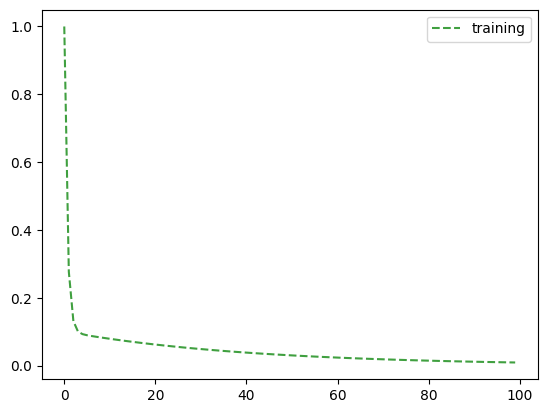

In [170]:
model = LinearRegression(n_iters=100, learning_rate=0.1)
model.fit(X,y, print_loss=True)

In [171]:
print("weights:", model.weights)
print("bias:", model.bias)

weights: [0.8900086]
bias: 0.25003629647660974


In [172]:
pred = model.predict(np.array([[1],[4]]))
print(pred)

[1.1400449  3.81007071]


# Diabetes Dataset

In [173]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes(as_frame=True)

In [174]:
import pandas as pd

df = pd.DataFrame(diabetes_dataset['data'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [175]:
X_full = df.drop('s6', axis=1)
y_full = df['s6']

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

Final training loss 0.03607455185786559
Final validation loss 0.03837736557233175


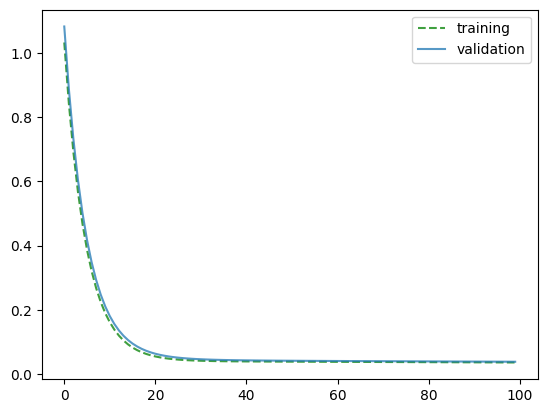

In [184]:
model = LinearRegression(learning_rate=0.1, n_iters=100)
model.fit(X_train, y_train, print_loss=True, X_val=X_val, y_val=y_val)

Training and validation loss are going towards zero so we can assume the model is working!

# Compare with Scikit-Learn

In [178]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error

sklearn_model = SklearnLinearRegression()

sklearn_model.fit(X_train, y_train)
print("training mse:", mean_squared_error(y_train, sklearn_model.predict(X_train)))
print("validation mse:", mean_squared_error(y_val, sklearn_model.predict(X_val)))

training mse: 0.0015381055760831164
validation mse: 0.0015055519724465124


The loss / mse looks pretty close to what we got from the model from scratch.

If we run the linear regression model from scratch for more iterations we can get just about the same loss values.

Final training loss 0.0015539653442616587
Final validation loss 0.0014694400843295813


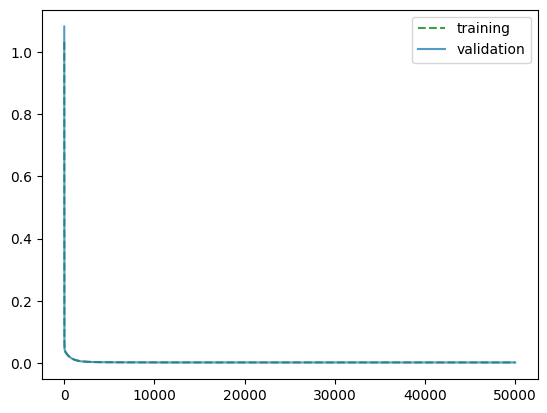

In [189]:
model = LinearRegression(learning_rate=0.1, n_iters=50000)
model.fit(X_train, y_train, print_loss=True, X_val=X_val, y_val=y_val)